In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('TB_Burden_Country.csv')
print('done')
print(df.head())

done
  Country or territory name ISO 2-character country/territory code  \
0               Afghanistan                                     AF   
1               Afghanistan                                     AF   
2               Afghanistan                                     AF   
3               Afghanistan                                     AF   
4               Afghanistan                                     AF   

  ISO 3-character country/territory code  ISO numeric country/territory code  \
0                                    AFG                                   4   
1                                    AFG                                   4   
2                                    AFG                                   4   
3                                    AFG                                   4   
4                                    AFG                                   4   

  Region  Year  Estimated total population number  \
0    EMR  1990                          

In [4]:
df.shape

(5120, 47)

In [5]:
df.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [6]:
df.dtypes

Country or territory name                                                                          object
ISO 2-character country/territory code                                                             object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [9]:
int_cols = df.select_dtypes(include='int64').columns
print(int_cols)

Index(['ISO numeric country/territory code', 'Year',
       'Estimated total population number'],
      dtype='object')


In [10]:
float_cols = df.select_dtypes(include='float64').columns
print(float_cols)

Index(['Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
       'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
       'Estimated mortality of TB cases who are HIV

In [11]:
int_cols = df.select_dtypes(include='object').columns
print(int_cols)

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code', 'Region',
       'Method to derive prevalence estimates',
       'Method to derive mortality estimates',
       'Method to derive incidence estimates'],
      dtype='object')


In [13]:
duplicates = df.duplicated()
print(duplicates)
df[df.duplicated(keep=False)]

0       False
1       False
2       False
3       False
4       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5120, dtype: bool


,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"


In [14]:
rows_with_missing_values = df[df.isna().any(axis=1)]
print(rows_with_missing_values)
print(rows_with_missing_values.shape)

     Country or territory name ISO 2-character country/territory code  \
0                  Afghanistan                                     AF   
1                  Afghanistan                                     AF   
2                  Afghanistan                                     AF   
3                  Afghanistan                                     AF   
4                  Afghanistan                                     AF   
...                        ...                                    ...   
5115                  Zimbabwe                                     ZW   
5116                  Zimbabwe                                     ZW   
5117                  Zimbabwe                                     ZW   
5118                  Zimbabwe                                     ZW   
5119                  Zimbabwe                                     ZW   

     ISO 3-character country/territory code  \
0                                       AFG   
1                            

In [15]:
null_vals = df.isnull().sum()
print(null_vals)

Country or territory name                                                                            0
ISO 2-character country/territory code                                                              24
ISO 3-character country/territory code                                                               0
ISO numeric country/territory code                                                                   0
Region                                                                                               0
Year                                                                                                 0
Estimated total population number                                                                    0
Estimated prevalence of TB (all forms) per 100 000 population                                        0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                            20
Estimated prevalence of TB (all forms) per 100 000 population, high bound

In [44]:
df.drop_duplicates(inplace=True)
df.drop('Method to derive TBHIV estimates', axis=1, inplace=True)

In [46]:
df.columns
df.shape

(0, 46)

In [21]:
df.dropna(inplace=True)

In [35]:
value = df[Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population].apply(lambda x: isinstance(x,float)).all()
return value

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2185728997.py, line 1)

In [42]:
def find_outliers_zscore(data:object, column:str) -> 'str':
    z_score = np.abs((data[column] - data[column].mean() / data[column].std()))
    outliers = data[(z_score>2)]
    return outliers
print('done')

done


In [47]:
df.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

C:\Users\monro\AppData\Local\Temp\ipykernel_2448\331706248.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="Estimated total population number", y="Estimated number of deaths from TB (all forms, excluding HIV)", hue="ISO 2-character country/territory code", size="ISO 2-character country/territory code",


getting ready to plot


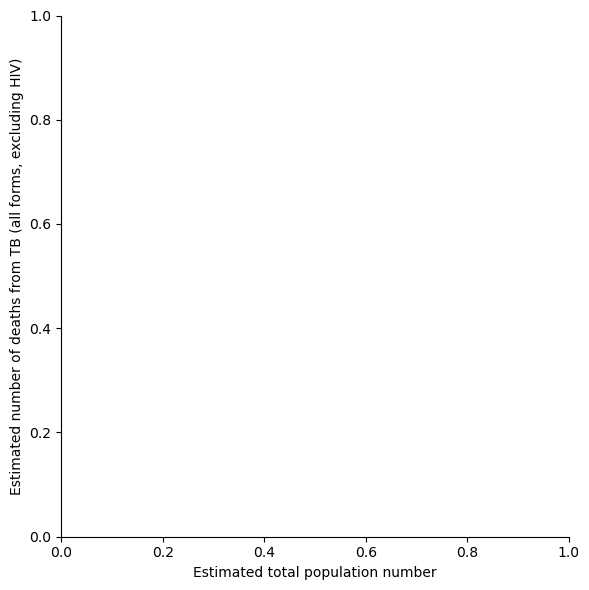

In [57]:
sns.relplot(x="Estimated total population number", y="Estimated number of deaths from TB (all forms, excluding HIV)", hue="ISO 2-character country/territory code", size="ISO 2-character country/territory code", 
           sizes=(40, 400), alpha=.5, palette='muted', height=6, data=df)
print('getting ready to plot')

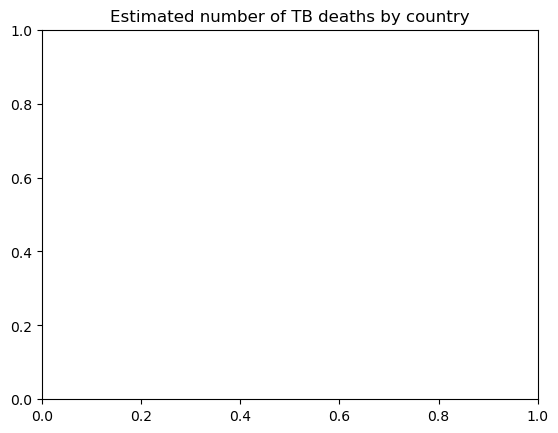

In [51]:
sns.countplot(x="ISO 2-character country/territory code", hue='Estimated number of deaths from TB (all forms, excluding HIV)', data=df)
plt.title('Estimated number of TB deaths by country')
plt.show()

In [53]:
df.to_csv('final_dataset.csv', index=False)

In [ ]:
In this dataset, I was able to find rows with missing, inconsistant or invalid values, 
and search for outliers. 
I had some trouble tring to get my visual graphs to show, and I feel like it would be much easier
to see things such as outliers on a visual graph.
Im looking forward to comparing my findings with others in the class, and possibly find solutions
to some of the problems I was having.
Overall, I felt like Jupyter Notebook provided an effective way to search though and 
clean a dataset.